In [ ]:
import csv
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')
lbcode = LabelEncoder()
filePath = "/content/drive/MyDrive/penguins.csv"

Mounted at /content/drive


In [ ]:
thresholds = []
df = pd.read_csv(filePath)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


#Question 1

1] i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
225,0,46.5,14.8,217,5200,0,2008
206,0,46.5,14.4,217,4900,0,2008
69,2,41.8,19.4,198,4450,1,2008
274,0,45.2,14.8,212,5200,0,2009
124,2,35.2,15.9,186,3050,0,2009
...,...,...,...,...,...,...,...
87,1,36.9,18.6,189,3500,0,2008
63,0,41.1,18.2,192,4050,1,2008
326,1,48.1,16.4,199,3325,0,2009
337,1,46.8,16.5,189,3650,0,2009


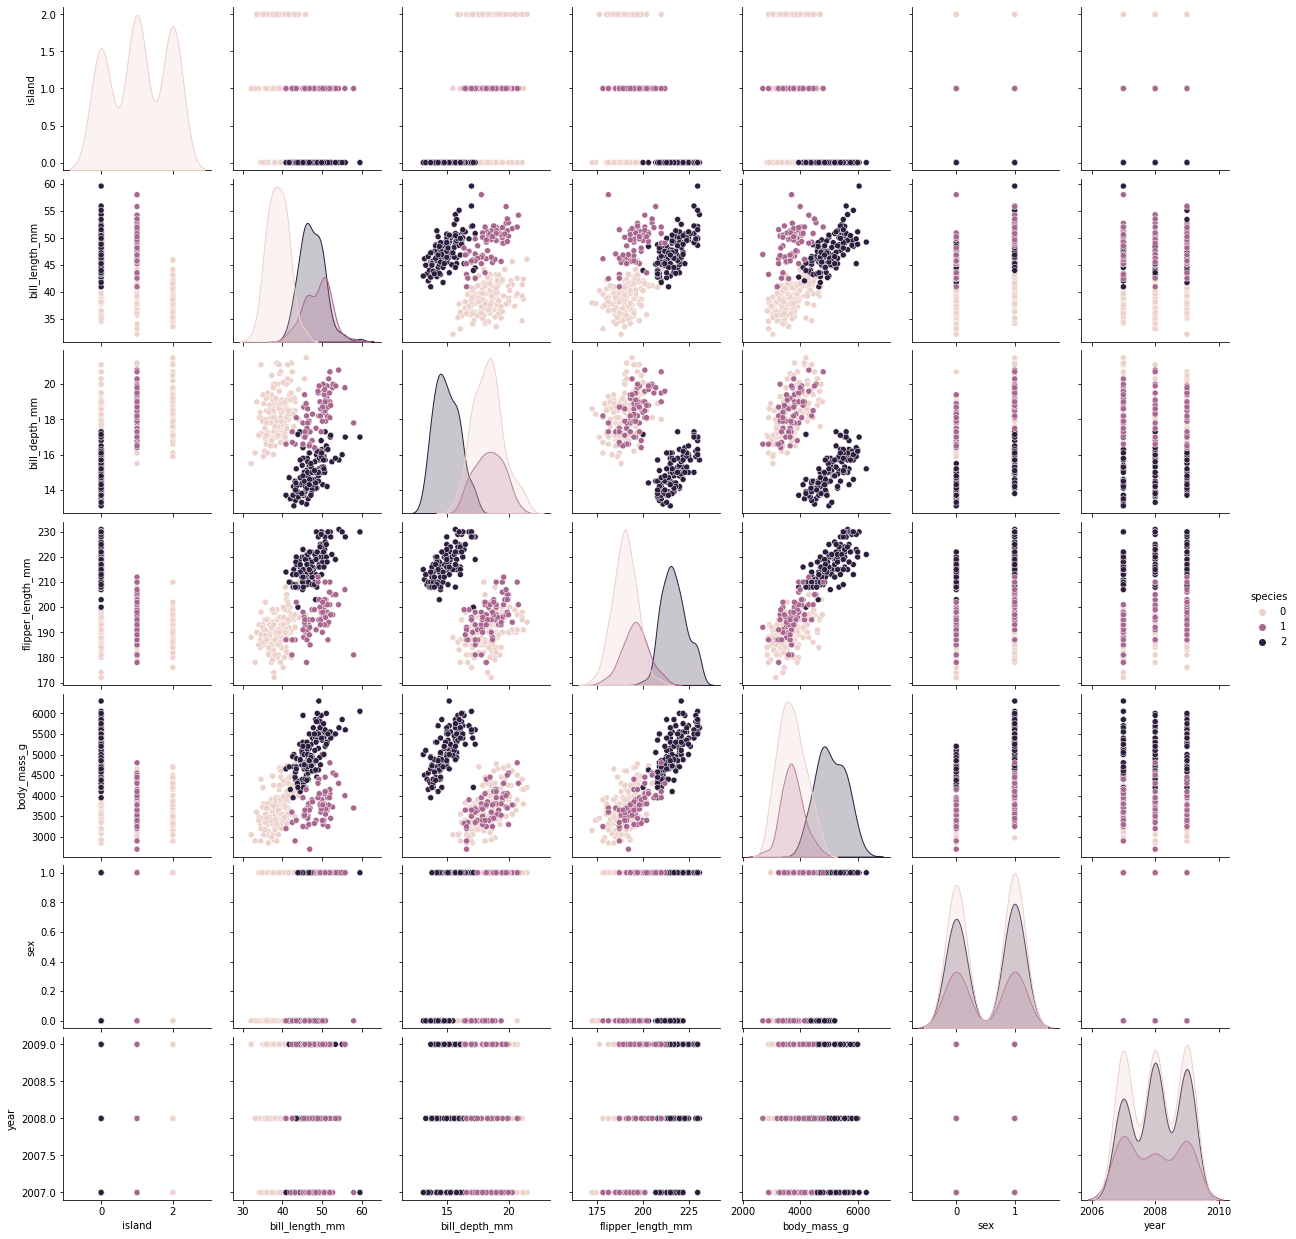

In [ ]:
df = df.fillna(df.mean())                                                       #correted NAN in numeric columns
df = df.fillna("male")                                                          #corrected NAN in string/object columns
df = df.astype({'flipper_length_mm':'int32', 'body_mass_g':'int32'})            #changed unnecessary float to int

for i in range(len(df.columns)):
    if(df.dtypes[i] == 'O'):
        df[df.columns[i]] = lbcode.fit_transform(df[df.columns[i]])             #Categorical encoding of columns with dtype: object

# for i in df.columns:
#     plt.scatter(df[i],df.species)                                               #data visualisation
#     plt.xlabel(i)
#     plt.show()
#     print()

sns.pairplot(data=df, hue = 'species')
x= df.drop('species', axis = 1)                                                 #drop output from dataset and store in x
y= df.species                                                                   #define y as output

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size  =0.7, random_state=101) #split


x_train

1] ii)

In [ ]:
def GetGini(arr):                       #given an array arr, find the gini index: 1 - summation(p(i)^2)
    sum1 = sum(arr)
    sqSum = 0

    if(sum1 == 0):
        return 0

    for i in arr:
        sqSum+=i*i

    return (1-sqSum/(sum1*sum1))   



1] iii)

In [ ]:
def Split(colName, df, spec):           # Spilt individual columns into 1s and 0s by first finding their repective optimal thresholds
    colMain = df[colName]
    #spec = df.species
    indx = df.index
    bestGini = 100
    bestThres = -1
    temp = []
    for i in colMain:
        col = list(colMain)
        
        for j in range(len(col)):       #assume current iterator to be temperary threshold
            if(col[j]<i):
                col[j] = 0
            else:
                col[j] = 1
       
        y = [0 for j in range(3)]
        x = [0 for j in range(3)]
        
        for k in range(len(col)):       
            if(col[k]):
                if(spec[indx[k]] == 0):
                    y[0]+=1
                elif(spec[indx[k]] == 1):
                    y[1]+=1
                else:
                    y[2]+=1
            else:
                if(spec[indx[k]] == 0):
                    x[0]+=1
                elif(spec[indx[k]] == 1):
                    x[1]+=1
                else:
                    x[2]+=1

        
        ySum = sum(y)
        xSum = sum(x)

        ySq = 0
        xSq = 0
        for j in range(3):
            if(ySum):
                ySq+=(y[j]*y[j]/(ySum*ySum))
            if(xSum):
                xSq+=(x[j]*x[j]/(xSum*xSum))
        
        tempVal = (GetGini(y)*ySum/(ySum+xSum) + (GetGini(x))*xSum/(ySum+xSum)) #calculate gini for the temperary threshold: temporary gini
        if(bestGini > tempVal):
            bestGini = tempVal                                                  #get the best ginni and corresponding value of that feature
            bestThres = i
    
    thresholds.append(bestThres)
    
    for i in indx:
        if(colMain[i]<bestThres):                                               #edit the column with respect to the best threshold
            colMain[i] = 0
        else:
            colMain[i] = 1

    return df

for i in range(len(x_train.columns)):                                           #Call split for columns
     Split(x_train.columns[i], x_train, y_train)

#Split("bill_length_mm", x_train, y_train)
x_train
print(thresholds)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[1, 42.5, 16.4, 207, 4575, 1, 2008]


1] iv) a.

In [ ]:
def GetAttributeGinni(colName, df, spec):                                       #Get gini index of a specific feature in x_train with name: colName
    col = df[colName]
    indx = df.index

    y = [0 for i in range(3)]
    x = [0 for i in range(3)]
        

    for k in range(len(col)):
        if(col[indx[k]]):
            if(spec[indx[k]] == 0):
                y[0]+=1
            elif(spec[indx[k]] == 1):
                y[1]+=1
            else:
                y[2]+=1
        else:
            if(spec[indx[k]] == 0):
                x[0]+=1
            elif(spec[indx[k]] == 1):
                x[1]+=1
            else:
                x[2]+=1

        
    ySum = sum(y)
    xSum = sum(x)

    if(ySum+xSum == 0):
        return 0
        
    return (GetGini(y)*ySum/(ySum+xSum) + (GetGini(x))*xSum/(ySum+xSum))        #Get weighted gini

def GetBestAttribute(df, spec):                                                 #get best current attribute with lowast gini index in dataframe df(which further will be sub dataframe of whole datafrmae)
    att = ""
    bestGinni = 100
    for i in df.columns:
        if(bestGinni > GetAttributeGinni(i, df, spec)):
            bestGinni = GetAttributeGinni(i, df, spec)
            att = i

    return [bestGinni, att]

GetBestAttribute(x_train, y_train)                                              #just to test, called on the whole dataSet


[0.30704365079365087, 'flipper_length_mm']

In [ ]:
def ClassCounts(df):                                                            # function to calculate count of different values in a data frame column and storing it in dictionary
    temp = {}

    for i in df:
        if(i in temp):
            temp[i]+=1
        else:
            temp[i] = 1
        
    return temp

ClassCounts(y_train)    

{0: 111, 1: 47, 2: 82}

4]  b)  c) AND 5]

In [ ]:
#Build Tree components
class Leaf:                                                                 
    def __init__(self, temp_df):
        self.predictions = ClassCounts(temp_df)

class DecisionNode:
    def __init__(self,feature,true_branch,false_branch):
        self.feature = feature
        self.true_branch = true_branch
        self.false_branch = false_branch

In [ ]:
#Build the actual tree
def BuildTree(df, spec, depth, loss):                   
    bestGinni, att = GetBestAttribute(df, spec)                 #get best attribute to split on and corresponding gini index
    if(bestGinni == 0 or depth>4 or loss<bestGinni):            #assure that the depth of tree does not exceed a specific value(4, here) and self-identify to stop when there is no information gain being done,
        return Leaf(spec)

    df_y = df[df[att] == 1]                                        #splt the data frame with respect to the 'best' deature
    df_x = df[df[att] == 0]
    spec_y = spec[df[att] == 1]
    spec_x = spec[df[att] == 0]

    df_y = df_y.drop(att, axis = 1)
    df_x = df_x.drop(att, axis = 1)

    trueBranch = BuildTree(df_y, spec_y, depth+1, bestGinni)        #recursicely build the trueSubtree for attribute value 1
    falseBranch = BuildTree(df_x,spec_x, depth+1, bestGinni)        #recursicely build the trueSubtree for attribute value 0

    return DecisionNode(att,trueBranch,falseBranch)   
tempTree = BuildTree(x_train, y_train, 0, 10)


In [ ]:
def print_tree(node, spacing=""):                               #print the tree

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the feature at this node
    print (spacing + str(node.feature))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")
print_tree(tempTree)

flipper_length_mm
--> True:
  island
  --> True:
    Predict {0: 1, 1: 3}
  --> False:
    Predict {2: 80}
--> False:
  bill_length_mm
  --> True:
    Predict {1: 44, 2: 2, 0: 9}
  --> False:
    Predict {0: 101}


1] 6)

In [ ]:
dictThres = {}
for i in range(len(x_test.columns)):
    dictThres[x_test.columns[i]] = thresholds[i]
    
print(dictThres)
print(list(y_test))
indx = x_test.index

def FindMax(dict1):                                           #find the key with highest value
    temp = 0
    ans = 0
    for i in dict1:
        if(temp<dict1[i]):
            ans = i
            temp = dict1[i]

    #print(ans)
    return ans

ansList = []
def Classify(row, node, x_test):                                            # function to specify the input(given as row number in dataset x_test) corresponding to the build decision Tree
    if isinstance(node, Leaf):                                  #base condition when a leaf is hit
        ansList.append(FindMax(node.predictions))
        return 

    else:
        if(x_test[node.feature][indx[row]]>=dictThres[node.feature]): #transvers on true Subtree if attribute value is higher that the threshold
            Classify(row, node.true_branch, x_test)
        else:
            Classify(row, node.false_branch, x_test)                    #transvers on false Subtree if attribute value is lower that the threshold





{'island': 1, 'bill_length_mm': 42.5, 'bill_depth_mm': 16.4, 'flipper_length_mm': 207, 'body_mass_g': 4575, 'sex': 1, 'year': 2008}
[0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2]


1] 7)

In [ ]:
for i in range(len(x_test)):                    #classify each row in x_test
    (Classify(i, tempTree, x_test))

print(ansList)
validList = y_test.tolist()
score = acc(validList, ansList)
print(score*100)   

def accuracy(y_test, decision_pred):
    m0 = m1 = m2 = 0

    for i in range(len(y_test)):
        if(y_test[i] == decision_pred[i] and y_test[i] == 0):
            m0+=1
        elif(y_test[i] == decision_pred[i] and y_test[i] == 1):
            m1+=1
        elif(y_test[i] == decision_pred[i] and y_test[i] == 2):
            m2+=1       
                
    print("Average Accuracy"+str((m0+m1+m2)*100/len(y_test))+"%")   


        


[0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2]
94.23076923076923


#Question 2

In [ ]:
import csv
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')
lbcode = LabelEncoder()
filePath = "/content/drive/MyDrive/dataQ2.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2] 1)

In [ ]:
df = pd.read_csv(filePath)
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


In [ ]:
df = df.fillna(df.mean)
x= df.drop('Y1', axis = 1)                                                 #drop output from dataset and store in x
y= df.Y1                                                                   #define y as output

x_train1, x_test, y_train1, y_test = train_test_split(x,y, test_size=0.2,random_state=1042)

x_train, x_validation, y_train, y_validation = train_test_split(x_train1,y_train1,test_size=0.125,random_state=42)


2] 2)

In [ ]:
regressor = DecisionTreeRegressor(max_depth = 5)
regressor.fit(x_train, y_train)

pred = regressor.predict(x_validation)
mse(y_validation, pred)

1.6025289972817351

Hyper Parameter: Depth

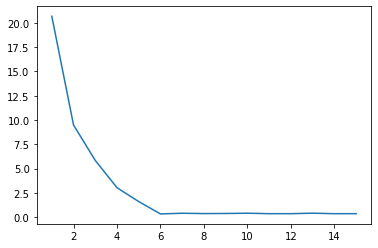

6


In [ ]:
depth = [i+1 for i in range(15)]
mses = []
for i in range(len(depth)):
    regressor1 = DecisionTreeRegressor(max_depth = depth[i])
    regressor1.fit(x_train,y_train)
    mses.append(mse(y_validation, regressor1.predict(x_validation)))

plt.plot( depth,mses)
plt.show()
bestDepth = mses.index(min(mses)) + 1
print(bestDepth)

Hyper Parameter: Min Samples Split

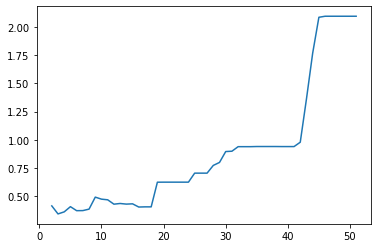

3


In [ ]:
minSplit = [i+2 for i in range(50)]
mses = []
for i in range(len(minSplit)):
    regressor2 = DecisionTreeRegressor(min_samples_split=minSplit[i])
    regressor2.fit(x_train,y_train)
    mses.append(mse(y_validation, regressor2.predict(x_validation)))

plt.plot( minSplit,mses)
plt.show()
bestMinSplit = mses.index(min(mses)) + 2
print(bestMinSplit)

Hyper Parameter: Max Leaf Node

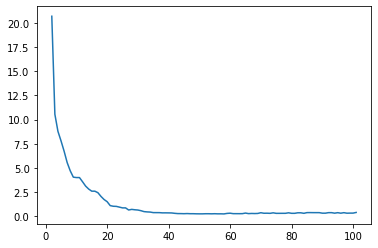

58


In [ ]:
maxLeafNode = [i+2 for i in range(100)]
mses = []
for i in range(len(maxLeafNode)):
    regressor3 = DecisionTreeRegressor(max_leaf_nodes=maxLeafNode[i])
    regressor3.fit(x_train,y_train)
    mses.append(mse(y_validation, regressor3.predict(x_validation)))

plt.plot( maxLeafNode,mses)
plt.show()
bestMaxLeafNode = mses.index(min(mses)) + 2
print(bestMaxLeafNode)

Hyper Parameter: Min Samples Leaf

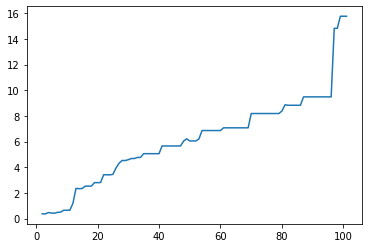

3


In [ ]:
minSampLeaf = [i+2 for i in range(100)]
mses = []
for i in range(len(minSampLeaf)):
    regressor4 = DecisionTreeRegressor(min_samples_leaf=minSampLeaf[i])
    regressor4.fit(x_train,y_train)
    mses.append(mse(y_validation, regressor4.predict(x_validation)))

plt.plot( maxLeafNode,mses)
plt.show()
bestminSampLeaf = mses.index(min(mses)) + 2
print(bestminSampLeaf)

2] 3)

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model=DecisionTreeRegressor(max_depth = bestDepth, min_samples_split=bestMinSplit, max_leaf_nodes=bestMaxLeafNode, min_samples_leaf=bestminSampLeaf)
kf = KFold(n_splits=5)
result=cross_val_score(model,x,y,cv=kf)
print(result)
print("Accuracy")
print(np.mean(result)*100)

[0.83853561 0.99514777 0.99671693 0.99771041 0.99475189]
Accuracy
96.45725209599274


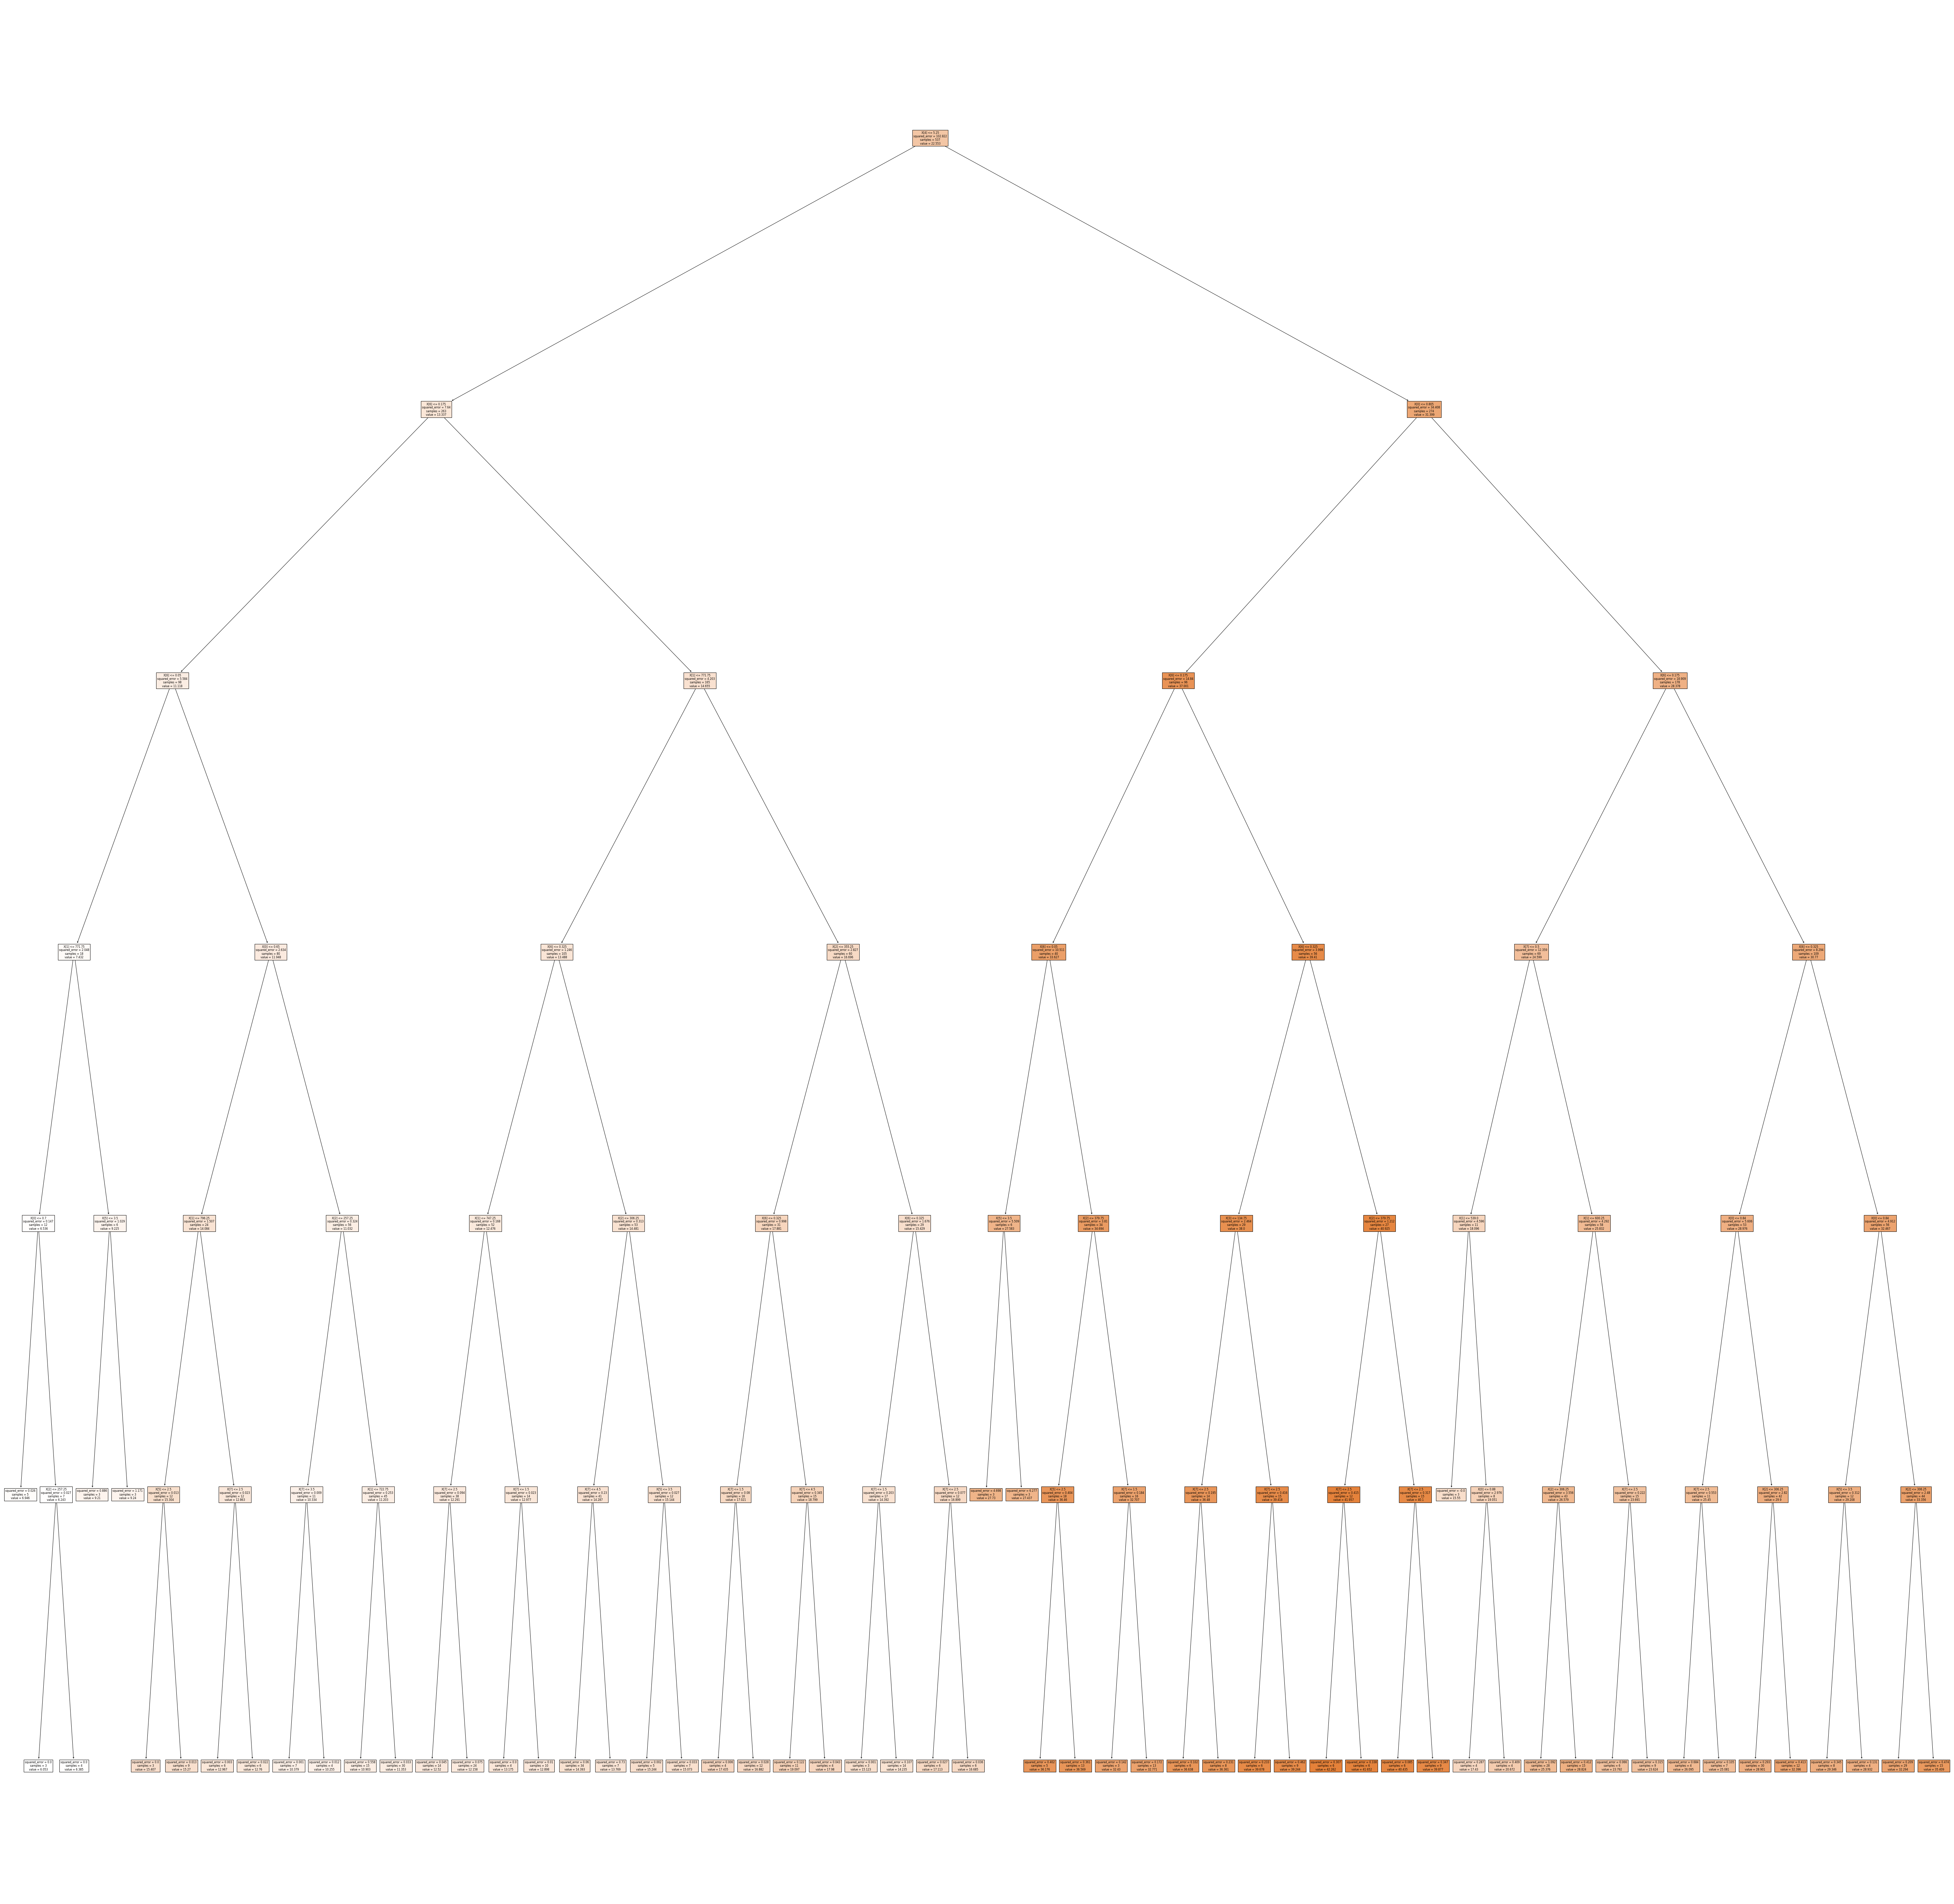

In [ ]:
from sklearn import tree
RegressionTree =DecisionTreeRegressor(max_depth = bestDepth, min_samples_split=bestMinSplit, max_leaf_nodes=bestMaxLeafNode, min_samples_leaf=bestminSampLeaf)
RegressionTree.fit(x_train,y_train)
plt.figure(figsize=(100,100))
tree.plot_tree(RegressionTree,filled=True)

plt.show()